In [1]:
import tensorflow
tensorflow.__version__

/home/Dinnu/miniconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.4.1'

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.5'

In [3]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import zipfile
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.preprocessing import image

np.random.seed(100)
%matplotlib inline

In [4]:
from bokeh import __version__ as bokeh_version
print("Bokeh - %s" % bokeh_version)              
from seaborn import __version__ as seaborn_version
print("Seaborn - %s" % seaborn_version)

Bokeh - 0.12.15
Seaborn - 0.8.1


In [5]:
# Import the required libraries for seaborn and bokeh

import seaborn as sns
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
output_notebook()

Loading BokehJS ...

In [6]:
rsna_train_label = pd.read_csv('data/boneage-training-dataset.csv', header=0, sep=',')
rsna_test_label = pd.read_csv('data/boneage-test-dataset.csv', header=0, sep=',')

In [7]:
rsna_train_label.head()

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False


In [8]:
# Format male column
rsna_train_label.loc[:,'male'] = pd.Series(rsna_train_label['male'].astype(int))

In [9]:
rsna_train_label.head()

,id,boneage,male
0,1377,180,0
1,1378,12,0
2,1379,94,0
3,1380,120,1
4,1381,82,0


In [10]:
rsna_train_label['male'].value_counts()

1    6833
0    5778
Name: male, dtype: int64

In [11]:
rsna_test_label.head()

,Case ID,Sex
0,4360,M
1,4361,M
2,4362,M
3,4363,M
4,4364,M


In [12]:
rsna_test_label['Sex'].value_counts()

M    100
F    100
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>


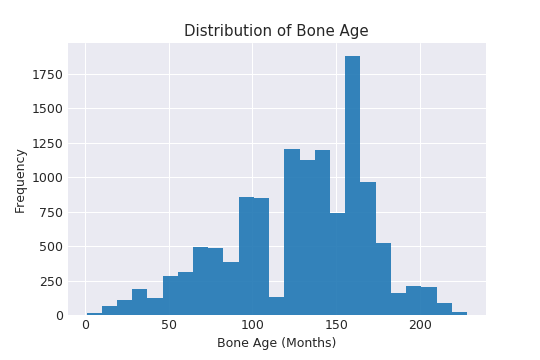

In [13]:
%matplotlib notebook

sns.set_style('darkgrid')
plot = plt.figure()
ax1 = plot.add_subplot(111)
ax1.hist(rsna_train_label['boneage'], alpha=0.9, bins=25)
ax1.set_xlabel('Bone Age (Months)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Bone Age')
plt.show()

In [14]:
# dimensions of our images
img_width, img_height = 512, 512

In [15]:
ROOT_PATH = "data/"
train_data_directory = os.path.join(ROOT_PATH, "boneage-training-dataset")
test_data_directory = os.path.join(ROOT_PATH, "boneage-test-dataset")

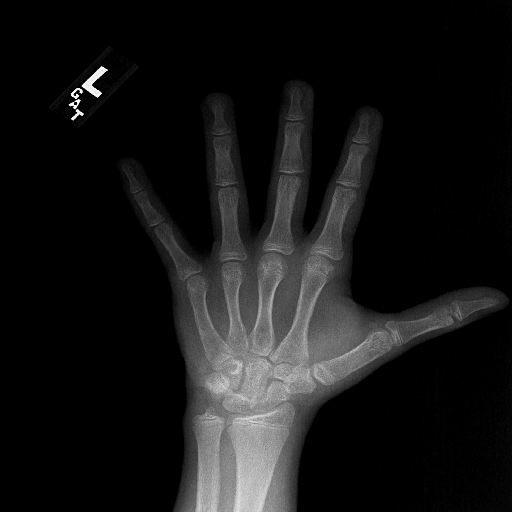

In [16]:
img_path = os.path.join(train_data_directory, '10001.png')
img = image.load_img(img_path, target_size=(img_width, img_height))
img

In [17]:
print(train_data_directory)
print(test_data_directory)

data/boneage-training-dataset
data/boneage-test-dataset


In [18]:
%%time

import os
import cv2
img_files = []
num_imgs = 12611

images_dataFrame = pd.DataFrame(columns=['id', 'image'])
img_files =  os.listdir(train_data_directory)

count = 0
for img_file in img_files[:num_imgs]:
    name = img_file.split('.')[0]
    try:
        img = cv2.imread(train_data_directory + '/' + img_file)
        img = cv2.resize(img, (img_width, img_height))
        #img = np.array(img, dtype='float32')
        images_dataFrame.loc[count] = [name, img]
        count += 1
    except(IOError, OSError):
        print('error')
        pass


CPU times: user 17min 41s, sys: 11.2 s, total: 17min 52s
Wall time: 10min 14s


In [19]:
images_dataFrame.head()

,id,image
0,15344,"[[[16, 16, 16], [16, 16, 16], [16, 16, 16], [1..."
1,6394,"[[[23, 23, 23], [22, 22, 22], [22, 22, 22], [2..."
2,6235,"[[[186, 186, 186], [171, 171, 171], [154, 154,..."
3,7628,"[[[0, 0, 0], [0, 0, 0], [100, 100, 100], [97, ..."
4,8651,"[[[17, 17, 17], [17, 17, 17], [17, 17, 17], [1..."


In [20]:
images_dataFrame['id'] = images_dataFrame.id.astype('int64')
images_dataFrame['id'].dtype

dtype('int64')

In [21]:
rsna_train_label.head()

,id,boneage,male
0,1377,180,0
1,1378,12,0
2,1379,94,0
3,1380,120,1
4,1381,82,0


In [22]:
rsna_train = pd.merge(rsna_train_label, images_dataFrame, on='id')
rsna_train.head()

,id,boneage,male,image
0,1377,180,0,"[[[239, 239, 239], [239, 239, 239], [243, 243,..."
1,1378,12,0,"[[[129, 129, 129], [128, 128, 128], [129, 129,..."
2,1379,94,0,"[[[129, 129, 129], [127, 127, 127], [128, 128,..."
3,1380,120,1,"[[[66, 66, 66], [62, 62, 62], [60, 60, 60], [5..."
4,1381,82,0,"[[[127, 127, 127], [128, 128, 128], [128, 128,..."


In [23]:
rsna_train = rsna_train.drop(['id'], axis=1)

In [24]:
rsna_train.head()

,boneage,male,image
0,180,0,"[[[239, 239, 239], [239, 239, 239], [243, 243,..."
1,12,0,"[[[129, 129, 129], [128, 128, 128], [129, 129,..."
2,94,0,"[[[129, 129, 129], [127, 127, 127], [128, 128,..."
3,120,1,"[[[66, 66, 66], [62, 62, 62], [60, 60, 60], [5..."
4,82,0,"[[[127, 127, 127], [128, 128, 128], [128, 128,..."


In [25]:
rsna_train['image'][0]

array([[[239, 239, 239],
        [239, 239, 239],
        [243, 243, 243],
        ...,
        [ 76,  76,  76],
        [ 74,  74,  74],
        [ 75,  75,  75]],

       [[242, 242, 242],
        [242, 242, 242],
        [246, 246, 246],
        ...,
        [ 73,  73,  73],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[237, 237, 237],
        [237, 237, 237],
        [242, 242, 242],
        ...,
        [ 70,  70,  70],
        [ 71,  71,  71],
        [ 73,  73,  73]],

       ...,

       [[230, 230, 230],
        [228, 228, 228],
        [231, 231, 231],
        ...,
        [ 47,  47,  47],
        [ 49,  49,  49],
        [ 45,  45,  45]],

       [[222, 222, 222],
        [220, 220, 220],
        [222, 222, 222],
        ...,
        [ 47,  47,  47],
        [ 47,  47,  47],
        [ 47,  47,  47]],

       [[229, 229, 229],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [ 51,  51,  51],
        [ 50,  50,  50],
        [ 45,  45,  45]]

In [26]:
rsna_train['image'].shape

(12611,)

In [27]:
rsna_train['image'][0].shape

(512, 512, 3)

In [28]:
rsna = rsna_train['image']

In [29]:
rsna.shape

(12611,)

In [30]:
rsna.head()

0    [[[239, 239, 239], [239, 239, 239], [243, 243,...
1    [[[129, 129, 129], [128, 128, 128], [129, 129,...
2    [[[129, 129, 129], [127, 127, 127], [128, 128,...
3    [[[66, 66, 66], [62, 62, 62], [60, 60, 60], [5...
4    [[[127, 127, 127], [128, 128, 128], [128, 128,...
Name: image, dtype: object

In [31]:
rsna[0].shape

(512, 512, 3)

In [32]:
images = []
for i, x in rsna_train.iterrows():
    images.append(rsna_train.loc[i, 'image'])
    
#X_train = np.array(images, dtype='float32')

In [33]:
len(images)

12611

In [34]:
images[0].shape

(512, 512, 3)

In [35]:
X_train = np.array(images, dtype='float32')

In [36]:
X_train.shape

(12611, 512, 512, 3)

In [37]:
gender = rsna_train['male'].values

In [38]:
bone_age = rsna_train['boneage'].values

In [39]:
y_train = rsna_train['boneage'].values
y_train.shape

(12611,)

In [40]:
# Normalize the data

X_train /= 255

In [41]:
X_train.shape

(12611, 512, 512, 3)

In [42]:
from keras.preprocessing.image import ImageDataGenerator

print("Augment the training dataset...")
train_data_gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False)

val_data_gen = ImageDataGenerator()

def gen_train_two_inputs(x, y, z):
    X1 = train_data_gen.flow(x, y, batch_size=batch_size, seed=20)
    X2 = train_data_gen.flow(x, z, batch_size=batch_size, seed=20)
    while True:
        X1i = X1.next()
        X2i = X2.next()
        yield [X1i[0], X1i[1]], X2i[1]
        
def gen_val_two_inputs(x, y, z):
    X1 = val_data_gen.flow(x, y, batch_size=batch_size, seed=20)
    X2 = val_data_gen.flow(x, z, batch_size=batch_size, seed=20)
    while True:
        X1i = X1.next()
        X2i = X2.next()
        yield [X1i[0], X1i[1]], X2i[1]

Augment the training dataset...


In [43]:
train_size = int(.85 * num_imgs)
train_gen_flow = gen_train_two_inputs(X_train[:train_size], gender[:train_size], bone_age[:train_size])
val_gen_flow = gen_val_two_inputs(X_train[train_size:], gender[train_size:], bone_age[train_size:])

In [44]:
train_size

10719

In [45]:
len(X_train[train_size:])

1892

In [46]:
len(X_train[:train_size])

10719

In [47]:
%%time

from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50

from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.metrics import mean_absolute_error
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

resnet_model = ResNet50(input_shape = X_train.shape[1:], include_top = False, weights = 'imagenet')
#v3_model.trainable = True

for layer in resnet_model.layers:
    layer.trainable = False

images_branch = resnet_model.output
images_branch = Flatten()(images_branch)

new_model = Model(inputs=resnet_model.input, outputs=images_branch)

age_branch = Sequential()
age_branch.add(Dense(128, input_shape=(1,), activation='relu'))

# merged = Merge([new_model, text_branch], mode='concat')
merged = keras.layers.concatenate([new_model.output, age_branch.output])

age = Dense(1000, activation='relu')(merged)
age = Dense(1000, activation='relu')(age)
age = Dense(1)(age)

# show model
# model.summary()
model = Model(inputs=[resnet_model.input, age_branch.input], outputs=age)

94658560/94653016 [==============================] - 1s 0us/step
CPU times: user 6.53 s, sys: 1.09 s, total: 7.63 s
Wall time: 9.11 s


In [48]:
%%time

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 256, 256, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [49]:
%%time
validation_split = 0.2
nb_epoch = 30
batch_size = 32

#optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0) 
#model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae', 'acc'])

CPU times: user 25.4 ms, sys: 3.92 ms, total: 29.4 ms
Wall time: 26.8 ms


In [50]:
# Call backs
#save_best = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto', period=1)
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001) 

In [51]:
%%time

# fit data
history = model.fit_generator(
    train_gen_flow,
    steps_per_epoch=200,
    epochs=30,
    validation_data=val_gen_flow,
    validation_steps=60,
    callbacks=[reduceLROnPlat]
)

Epoch 1/30
200/200 [==============================] - 691s 3s/step - loss: 1221.9815 - mean_absolute_error: 26.0370 - acc: 0.0117 - val_loss: 1814.4602 - val_mean_absolute_error: 36.1860 - val_acc: 0.0000e+00
Epoch 2/30
200/200 [==============================] - 654s 3s/step - loss: 608.3083 - mean_absolute_error: 19.1638 - acc: 0.0170 - val_loss: 1492.3353 - val_mean_absolute_error: 32.0484 - val_acc: 0.0085
Epoch 3/30
200/200 [==============================] - 653s 3s/step - loss: 555.1129 - mean_absolute_error: 18.4225 - acc: 0.0211 - val_loss: 2059.7939 - val_mean_absolute_error: 33.9139 - val_acc: 0.0063
Epoch 4/30
200/200 [==============================] - 664s 3s/step - loss: 518.6691 - mean_absolute_error: 17.7082 - acc: 0.0195 - val_loss: 1421.5109 - val_mean_absolute_error: 29.6911 - val_acc: 0.0100
Epoch 5/30
200/200 [==============================] - 658s 3s/step - loss: 433.4972 - mean_absolute_error: 16.1382 - acc: 0.0198 - val_loss: 1527.5923 - val_mean_absolute_error: 3

KeyboardInterrupt: 

In [53]:
%%time

import os
import cv2
img_files = []
num_imgs = 200

images_test = pd.DataFrame(columns=['id', 'image'])
img_files =  os.listdir(test_data_directory)

count = 0
for img_file in img_files[:num_imgs]:
    name = img_file.split('.')[0]
    try:
        img = cv2.imread(test_data_directory + '/' + img_file)
        img = cv2.resize(img, (img_width, img_height))
        #img = np.array(img, dtype='float32')
        images_test.loc[count] = [name, img]
        count += 1
    except(IOError, OSError):
        print('error')
        pass

CPU times: user 16.1 s, sys: 252 ms, total: 16.4 s
Wall time: 9.28 s


In [54]:
images_test.head()

,id,image
0,4541,"[[[94, 94, 94], [94, 94, 94], [94, 94, 94], [9..."
1,4544,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,4402,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,4393,"[[[62, 62, 62], [64, 64, 64], [65, 65, 65], [6..."
4,4433,"[[[70, 70, 70], [73, 73, 73], [73, 73, 73], [7..."


In [55]:
images_test['id'] = images_test.id.astype('int64')
images_test['id'].dtype

dtype('int64')

In [56]:
rsna_test_label.head()

,Case ID,Sex
0,4360,M
1,4361,M
2,4362,M
3,4363,M
4,4364,M


In [57]:
# Format male column
rsna_test_label['Sex'].replace(['F','M'],[0,1], inplace=True)

In [58]:
rsna_test_label.head()

,Case ID,Sex
0,4360,1
1,4361,1
2,4362,1
3,4363,1
4,4364,1


In [59]:
rsna_test_data = pd.merge(rsna_test_label, images_test, left_on='Case ID', right_on='id')
rsna_test_data.head()

,Case ID,Sex,id,image
0,4360,1,4360,"[[[107, 107, 107], [225, 225, 225], [225, 225,..."
1,4361,1,4361,"[[[44, 44, 44], [72, 72, 72], [72, 72, 72], [7..."
2,4362,1,4362,"[[[9, 9, 9], [12, 12, 12], [11, 11, 11], [10, ..."
3,4363,1,4363,"[[[85, 85, 85], [58, 58, 58], [49, 49, 49], [5..."
4,4364,1,4364,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [60]:
rsna_test_data = rsna_test_data.drop(['id'], axis=1)
rsna_test_data = rsna_test_data.drop(['Case ID'], axis=1)

In [61]:
rsna_test_data.head()

,Sex,image
0,1,"[[[107, 107, 107], [225, 225, 225], [225, 225,..."
1,1,"[[[44, 44, 44], [72, 72, 72], [72, 72, 72], [7..."
2,1,"[[[9, 9, 9], [12, 12, 12], [11, 11, 11], [10, ..."
3,1,"[[[85, 85, 85], [58, 58, 58], [49, 49, 49], [5..."
4,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [62]:
rsna_test_data['image'].shape

(200,)

In [63]:
rsna_test = rsna_test_data['image']

In [64]:
rsna_test.shape

(200,)

In [65]:
rsna_test.head()

0    [[[107, 107, 107], [225, 225, 225], [225, 225,...
1    [[[44, 44, 44], [72, 72, 72], [72, 72, 72], [7...
2    [[[9, 9, 9], [12, 12, 12], [11, 11, 11], [10, ...
3    [[[85, 85, 85], [58, 58, 58], [49, 49, 49], [5...
4    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
Name: image, dtype: object

In [66]:
images = []
for i, x in rsna_test_data.iterrows():
    images.append(rsna_test_data.loc[i, 'image'])
    
#X_train = np.array(images, dtype='float32')

In [67]:
len(images)

200

In [68]:
X_test = np.array(images, dtype='float32')

In [69]:
X_test.shape

(200, 512, 512, 3)

In [70]:
gender_test = rsna_test_data['Sex'].values

In [71]:
X_test /= 255

In [72]:
X_test.shape

(200, 512, 512, 3)

In [73]:
rsna_test_label.head()

,Case ID,Sex
0,4360,1
1,4361,1
2,4362,1
3,4363,1
4,4364,1


In [74]:
test_data_gen = ImageDataGenerator()
batch_size = 32

def gen_test_two_inputs(x, y, z):
    X1 = test_data_gen.flow(x, y, batch_size=batch_size, seed=20)
    X2 = test_data_gen.flow(x, z, batch_size=batch_size, seed=20)
    while True:
        X1i = X1.next()
        X2i = X2.next()
        yield [X1i[0], X1i[1]], X2i[1]

In [ ]:
#test_gen_flow = gen_train_two_inputs(X_test[:train_size], gender[:train_size], bone_age[:train_size])

In [ ]:
# Score trained model.
#scores = model.evaluate(X_test, y_test, verbose=1)
#print('Test loss:', scores[0])
#print('Test accuracy:', scores[1])

In [75]:
output_resnet = model.predict([X_test, gender_test])

In [76]:
output_resnet

array([[137.36899 ],
       [137.16423 ],
       [133.75406 ],
       [137.99992 ],
       [136.32838 ],
       [137.41261 ],
       [137.36504 ],
       [136.09767 ],
       [132.82439 ],
       [135.17747 ],
       [138.09425 ],
       [136.30948 ],
       [139.71346 ],
       [138.16383 ],
       [137.22342 ],
       [136.9357  ],
       [137.70998 ],
       [136.94313 ],
       [135.9953  ],
       [132.85019 ],
       [136.2968  ],
       [137.27597 ],
       [136.94495 ],
       [138.14462 ],
       [137.20694 ],
       [137.69498 ],
       [136.28264 ],
       [136.75127 ],
       [132.9295  ],
       [137.5338  ],
       [135.4633  ],
       [137.12057 ],
       [136.91411 ],
       [137.66206 ],
       [137.8445  ],
       [135.96481 ],
       [137.75374 ],
       [137.31221 ],
       [136.7769  ],
       [137.45975 ],
       [137.66359 ],
       [136.41338 ],
       [136.54977 ],
       [132.93217 ],
       [137.46982 ],
       [137.3399  ],
       [137.54541 ],
       [137.1